In [2]:
# Data Manupulation
import numpy as np
import pandas as pd
import sklearn as sl
import ydata_profiling as yp

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Activation, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from summarytools import dfSummary

import warnings
warnings.filterwarnings("ignore")


c:\Users\ramma\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def ouno(df):
  """
  Prints information about a DataFrame, including shape, data types, unique values, and null values (with descending null value order).

  Args:
      df: Pandas DataFrame.
  """
  print('+'*100)
  print('Shape of the dataframe is: ', df.shape)
  print('+'*100)
  print('{:<20} {:<25} {:<20} {:<25}'.format('Field Name', 'Object Type', 'Unique Label Count', 'Null Values (Percentage)'))
  print('+'*100)

  # Sort by null values in descending order
  df_sorted = df.isnull().sum().sort_values(ascending=False)
  total_rows = len(df)

  for col in df_sorted.index:
    unique_labels_count = len(df[col].unique())
    object_type = str(df[col].dtype)  # Convert dtype to string
    null_values = df[col].isna().sum()
    null_percentage = (null_values / total_rows) * 100
    print('{:<20} {:<25} {:<20} {:<25}'.format(col, object_type, unique_labels_count, f'{null_values} ({null_percentage:.2f}%)'))

  print('+'*100)

In [4]:
# Getting data
train_df = pd.read_csv('train.csv')
test_df =  pd.read_csv('test.csv')

In [5]:
# View Training Data
train_df.head()
# Predict Premium amount depending on other data

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [6]:
# View Testing Data
test_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [7]:
train_df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [8]:
test_df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration
count,8.000000e+05,787511.000000,770140.000000,726870.000000,750551.000000,557198.000000,799997.000000,708549.000000,799998.000000
mean,1.600000e+06,41.136440,32803.871471,2.009337,25.613036,1.004873,9.571891,592.904749,5.018949
std,2.309403e+05,13.537829,32201.063749,1.415241,12.206882,0.982803,5.772200,150.116374,2.593759
min,1.200000e+06,18.000000,2.000000,0.000000,1.646561,0.000000,0.000000,300.000000,1.000000
25%,1.400000e+06,30.000000,8048.000000,1.000000,15.917353,0.000000,5.000000,468.000000,3.000000
50%,1.600000e+06,41.000000,23981.000000,2.000000,24.580164,1.000000,10.000000,595.000000,5.000000
75%,1.799999e+06,53.000000,44660.000000,3.000000,34.517766,2.000000,15.000000,721.000000,7.000000
max,1.999999e+06,64.000000,149997.000000,4.000000,57.957351,9.000000,19.000000,849.000000,9.000000


In [9]:
ouno(train_df)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Shape of the dataframe is:  (1200000, 21)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Field Name           Object Type               Unique Label Count   Null Values (Percentage) 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Previous Claims      float64                   11                   364029 (30.34%)          
Occupation           object                    4                    358075 (29.84%)          
Credit Score         float64                   551                  137882 (11.49%)          
Number of Dependents float64                   6                    109672 (9.14%)           
Customer Feedback    object                    4                    77824 (6.49%)            
Health Score         float64                   532658               74076 (6.17%)          

In [10]:
ouno(test_df)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Shape of the dataframe is:  (800000, 20)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Field Name           Object Type               Unique Label Count   Null Values (Percentage) 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Previous Claims      float64                   11                   242802 (30.35%)          
Occupation           object                    4                    239125 (29.89%)          
Credit Score         float64                   551                  91451 (11.43%)           
Number of Dependents float64                   6                    73130 (9.14%)            
Customer Feedback    object                    4                    52276 (6.53%)            
Health Score         float64                   388703               49449 (6.18%)           

From the above we can observe that the data is at ID level.

'Occupation', 'Customer Feedback', 'Marital Status' are Categorical variables with null values.

'Previous Claims','Credit Score','Number of Dependents','Health Score','Annual Income','Age' are ranked/ numerical variables that have null values.

In [11]:
dfSummary(train_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 599999.5 (346410.3)min < med < max:0.0 < 599999.5 < 1199999.0IQR (CV) : 599999.5 (1.7),"1,200,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Age[float64],Mean (sd) : 41.1 (13.5)min < med < max:18.0 < 41.0 < 64.0IQR (CV) : 23.0 (3.0),47 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACuklEQVR4nO3avW7aUBiH8ffwERlIjVBSsrF0rNSBMUvvoBfbtVuQkhvI0KVTligSMka4QTiGLo3UCexzoPYfPb+ZA6+OH9t8ud1uZ0DTteoeACijU/cAp+Kc65nZRcBTbHa73eux5lHQ5D07y1Cdc72rq6tvcRyPfJ9juVwmzrnvPhsfeMBbZrb1XGvmGcsx9myxWKyccz/MbO2xfO/cB0MN3PS6rkoXcRyPbm9vX4fDYeVNS9M0ur+/H83n8wszqzR/yAEviqKbZdmny8vLX61WK6+63izoBAvas+fn5w8PDw9fJ5PJdbvdrrz+0Nx7Qw09y0KuSscwHA7X4/H4t+fynuc67wP+9PQ0enx8/DidTn/e3NwkVV845AR757tnSZL0oijqT6fTddXZy8x96Irqvelpmkaz2Ww8n8+vnXPLKmv/Ifs+0eeAJ0nSMzMbDAZ1nGBHETD73rlLvUf12fQsy7p5nn+ZTCZtn1uBWf1XZDTHyT5MbTabju+twOw4tzGcj5N/6le+jaE5+MIfEggVEggVEggVEggVEggVEs7yTynHUBRF18xi51zVpfF2u+2eYKRSVOc+pNGh1rXpIb+q5XkeFUXxeb1e35mZ7/fHXlTnLqOxoda56SG/qv39Y0n/7e2tXfV1Q6nOXUZjQ23Cpvv8qvb+x5I6qc69T2NDfXeOm47q+NQPCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCZ0yD0rTNKr6xKvVKjIzy7Isenl56f/P9aqvrTp36Poyff0BTzWgzEX6xjoAAAAASUVORK5CYII="">","18,705(1.6%)"
3,Gender[object],1. Male2. Female,"602,571 (50.2%)597,429 (49.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bwYnDMBRF0a8gwmQjYQwuxkVMsSlC3RhjLZKQjWYxDcR/8YTIPRV8zMWQ4BdaawYoBDO7mdm19yEDerfWnr2PGEmc5/k3pTT1PmQ0tdY9hHAnuM/FlNK0rusz5/zqfcwojuP4KaVM27ZdzYzYPhTNzHLOr2VZHr2PGcyt9wGjufQ+AN+D2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmWj2/zFg70NGwvPyibXWvZQyGR8DnlJr3c3s3fuOkTB48WPwclJgygcV3mw+vNUcmPI5MOPzYcp3EjM+P6Z8Pvxyd+BPXcgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggw5TvJJ6VH1M+B2Z8PgxefBi8OPwBCltq31np+ZoAAAAASUVORK5CYII="">",0(0.0%)
4,Annual Income[float64],Mean (sd) : 32745.2 (32179.5)min < med < max:1.0 < 23911.0 < 149997.0IQR (CV) : 36633.0 (1.0),"88,593 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoUlEQVR4nO3cu47aQBSA4TNhlwwQ2dwEHS1FpBRINDxAyjzsvgISRUrEG9AhwQoEgWBZTrNEkbKC9Qze9Rn9X72+FD9mvObYZFkmQNl9+ugTAN7i4dYfGGNqIlJ13P85y7Kj47bAX1dDNcbUOp3OjyiKWi473+12z8aYJ2KFr1tX1GoURa3JZHKM4/iUZ8fb7dbOZrPWer2uigihwsvNr34RkTiOT71e75fD/msO2wD/4WYKKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKb/o9qqs0TR9FJDLGuO6CURaISIGhHg6HxyRJvg0Gg0qlUsk1HXDBKAsuCgv1fD4/WGvro9Ho1O/3n/NuzygL/lXoV7+ISKPRcB1jEWGUBS+4mYIKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoULhv0f14TnKwhhLQEobqu8oC2MsYSltqD6jLIyxhKe0oV54jLIwxhIQbqagAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVCh

In [23]:
dfSummary(test_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 1599999.5 (230940.3)min < med < max:1200000.0 < 1599999.5 < 1999999.0IQR (CV) : 399999.5 (6.9),"800,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Age[float64],Mean (sd) : 41.1 (13.5)min < med < max:18.0 < 41.0 < 64.0IQR (CV) : 23.0 (3.0),47 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACxUlEQVR4nO3ZMU/bQByH4f8lBF0ItRVIYcvSEalDJBaWbh37Ybt26wBSZ4YunVgQEgqJ4hLFOOlCpkqJfQexf9H7zJx9+N6LnditVisDmq5V9wSAMg7qnsB7cc51zeww4hCL1Wr1/FbzQZy9DNU51z09Pf2WJEk/9BjT6XTsnPu+61jr3GBvcO6WmS0Dx26c916GamaHSZL0r66untM0nVcdPJlM/PX1df/x8fHQzCovesSC+5OTk69pmvYCxppZ+AaL3dxFUXSyLPt0fHz8p9Vq5VXHb5v31lAjd1mtt880TednZ2d/A4d3QwbFLHie597MLi4vL38NBoNp1fGRGyxqc9/d3fVvb28/jkaj3+fn5+MqY8vMe2Oosbvs6elp5pz7YWaV//FXis+JwQv+uthH3vt81xtsLXRzj8fjrplZr9cL/XDYOO9tn6jBF/3+/v7Dzc3Nl+FwOGi320Gh1vWc+BZCFny92PhfqWfU0IvuvT8ajUbzqrcCs/jnROyXd/8yFXErMIu8jWF/8IM/JBAqJBAqJBAqJBAqJBAqJOzru/5oRVF0zCxxzlUdmiyXy847TKkU1Xlv0+hQ67roWZZ18jz/PBwO21XfquV57ouiuJjP5z/NLPT34yCq8y6jsaHWedEXi8VB6Fu19fv6l5eXdtXzxlKddxmNDbUJFz3krVoT3terznuTxoa6to8XHdXxrR8SCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSDsr80WQy8VUPPJvNvJlZlmX+4eHhaJfjVc+tOu/Y8WX6+gchEovIMI4y5QAAAABJRU5ErkJggg=="">","12,489(1.6%)"
3,Gender[object],1. Male2. Female,"401,089 (50.1%)398,911 (49.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bwYnDMBRF0a8gwmQjYQwuxkVMsSlC3RhjLZKQjWYxDcR/8YTIPRV8zMWQ4BdaawYoBDO7mdm19yEDerfWnr2PGEmc5/k3pTT1PmQ0tdY9hHAnuM/FlNK0rusz5/zqfcwojuP4KaVM27ZdzYzYPhTNzHLOr2VZHr2PGcyt9wGjufQ+AN+D2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmWj2/zFg70NGwvPyibXWvZQyGR8DnlJr3c3s3fuOkTB48WPwclJgygcV3mw+vNUcmPI5MOPzYcp3EjM+P6Z8Pvxyd+BPXcgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggw5TvJJ6VH1M+B2Z8PgxefBi8OPwBCltq31np+ZoAAAAASUVORK5CYII="">",0(0.0%)
4,Annual Income[float64],Mean (sd) : 32803.9 (32201.1)min < med < max:2.0 < 23981.0 < 149997.0IQR (CV) : 36612.0 (1.0),"80,716 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoUlEQVR4nO3cu47aQBSA4TNhlwwQ2dwEHS1FpBRINDxAyjzsvgISRUrEG9AhwQoEgWBZTrNEkbKC9Qze9Rn9X72+FD9mvObYZFkmQNl9+ugTAN7i4dYfGGNqIlJ13P85y7Kj47bAX1dDNcbUOp3OjyiKWi473+12z8aYJ2KFr1tX1GoURa3JZHKM4/iUZ8fb7dbOZrPWer2uigihwsvNr34RkTiOT71e75fD/msO2wD/4WYKKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKb/o9qqs0TR9FJDLGuO6CURaISIGhHg6HxyRJvg0Gg0qlUsk1HXDBKAsuCgv1fD4/WGvro9Ho1O/3n/NuzygL/lXoV7+ISKPRcB1jEWGUBS+4mYIKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoULhv0f14TnKwhhLQEobqu8oC2MsYSltqD6jLIyxhKe0oV54jLIwxhIQbqagAqFCBUKFCoQKFQgVKhA

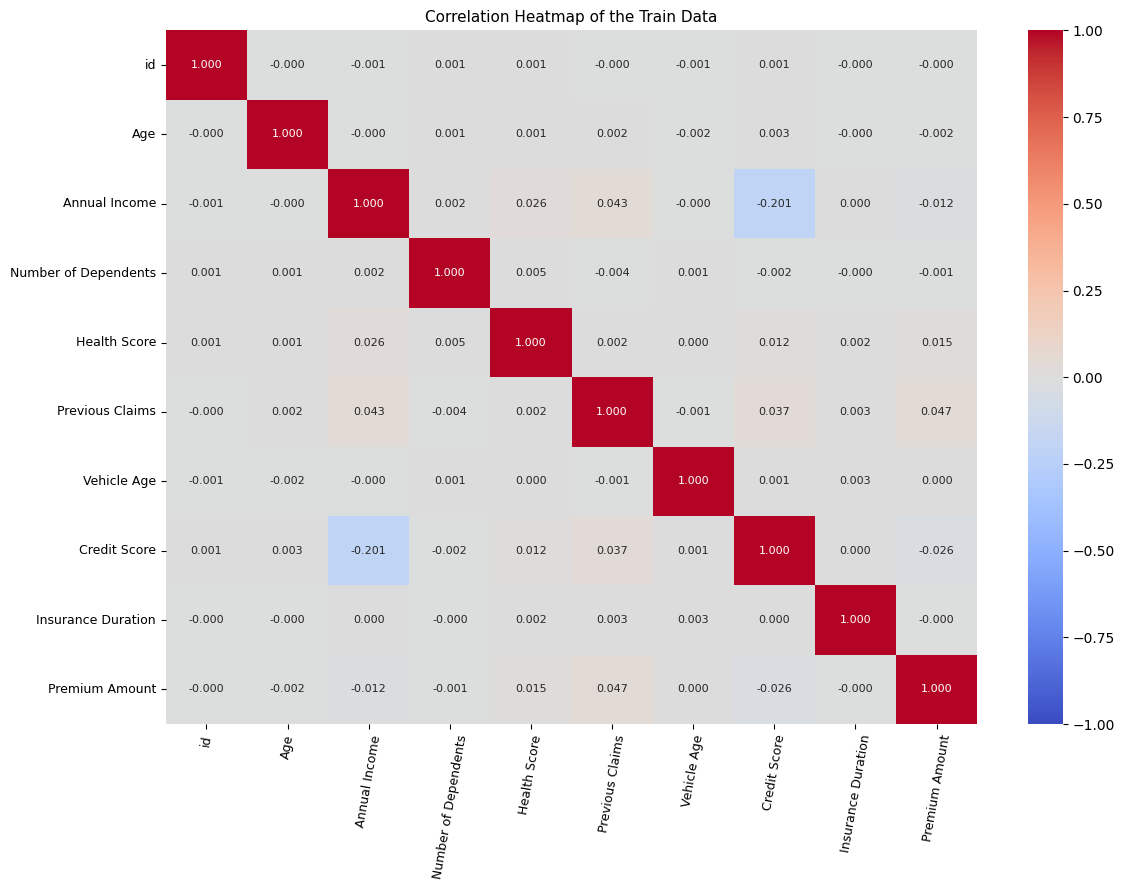

In [12]:
# Select only numeric columns from the training data
numeric_data = train_df.select_dtypes(include=['number'])

# Create the heatmap
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmax=1, vmin=-1,
                      annot_kws={"size": 8}, fmt=".3f")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=80, fontsize=9)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=9)

plt.title("Correlation Heatmap of the Train Data", fontsize=11)
plt.tight_layout()
plt.show()

Looks like the missing data needs to be updated before going ahead with further EDA.

The correlations are very vague or non existant.

In [13]:
# Save 'id' column for submission
test_ids = test_df['id']

# Define the target column
target_column = 'Premium Amount'

# Select categorical and numerical columns (initial)
categorical_columns = train_df.select_dtypes(include=['object']).columns
numerical_columns = train_df.select_dtypes(exclude=['object']).columns

# Print out column information
print("Target Column:", target_column)
print("\nCategorical Columns:", categorical_columns.tolist())
print("\nNumerical Columns:", numerical_columns.tolist())

Target Column: Premium Amount

Categorical Columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

Numerical Columns: ['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']


In [ ]:
# Select categorical and numerical columns (initial)
testcategorical_columns = test_df.select_dtypes(include=['object']).columns
testnumerical_columns = test_df.select_dtypes(exclude=['object']).columns

# Print out column information
print("\n Categorical test columns:", testcategorical_columns.tolist())
print("\n Numerical test columns:", testnumerical_columns.tolist())


Categorical test Columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

Numerical test Columns: ['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']


In [14]:
for column in categorical_columns:
    num_unique = train_df[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

'Gender' has 2 unique categories.
'Marital Status' has 3 unique categories.
'Education Level' has 4 unique categories.
'Occupation' has 3 unique categories.
'Location' has 3 unique categories.
'Policy Type' has 3 unique categories.
'Policy Start Date' has 167381 unique categories.
'Customer Feedback' has 3 unique categories.
'Smoking Status' has 2 unique categories.
'Exercise Frequency' has 4 unique categories.
'Property Type' has 3 unique categories.


In [18]:
ouno(train_df)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Shape of the dataframe is:  (1200000, 21)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Field Name           Object Type               Unique Label Count   Null Values (Percentage) 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Occupation           object                    4                    358075 (29.84%)          
Customer Feedback    object                    4                    77824 (6.49%)            
Marital Status       object                    4                    18529 (1.54%)            
id                   int64                     1200000              0 (0.00%)                
Vehicle Age          float64                   21                   0 (0.00%)                
Property Type        object                    3                    0 (0.00%)              

In [15]:
# Print top 5 unique value counts for each categorical column
for column in categorical_columns:
    print(f"\n Analysis for '{column}':")
    
    # Calculate value counts and percentages
    value_counts = train_df[column].value_counts()
    percentages = (value_counts / len(train_df) * 100).round(2)
    
    # Display top 5 value counts with percentages
    top_5 = value_counts.head(5)
    top_5_percentages = percentages.head(5)
    for value, count, percent in zip(top_5.index, top_5.values, top_5_percentages.values):
        print(f"{value}: {count} ({percent}%)")

    # Check for null values
    null_count = train_df[column].isnull().sum()
    if null_count > 0:
        null_percent = (null_count / len(train_df) * 100).round(2)
        print(f"Null values: {null_count} ({null_percent}%)")


 Analysis for 'Gender':
Male: 602571 (50.21%)
Female: 597429 (49.79%)

 Analysis for 'Marital Status':
Single: 395391 (32.95%)
Married: 394316 (32.86%)
Divorced: 391764 (32.65%)
Null values: 18529 (1.54%)

 Analysis for 'Education Level':
Master's: 303818 (25.32%)
PhD: 303507 (25.29%)
Bachelor's: 303234 (25.27%)
High School: 289441 (24.12%)

 Analysis for 'Occupation':
Employed: 282750 (23.56%)
Self-Employed: 282645 (23.55%)
Unemployed: 276530 (23.04%)
Null values: 358075 (29.84%)

 Analysis for 'Location':
Suburban: 401542 (33.46%)
Rural: 400947 (33.41%)
Urban: 397511 (33.13%)

 Analysis for 'Policy Type':
Premium: 401846 (33.49%)
Comprehensive: 399600 (33.3%)
Basic: 398554 (33.21%)

 Analysis for 'Policy Start Date':
2020-02-08 15:21:39.134960: 142 (0.01%)
2023-08-13 15:21:39.155231: 137 (0.01%)
2022-02-02 15:21:39.134960: 137 (0.01%)
2022-08-30 15:21:39.134960: 134 (0.01%)
2023-11-02 15:21:39.134960: 118 (0.01%)

 Analysis for 'Customer Feedback':
Average: 377905 (31.49%)
Poor: 375

In [22]:
# Print top 5 unique value counts for each categorical column
for column in categorical_columns:
    print(f"\n Analysis for test data column'{column}':")
    
    # Calculate value counts and percentages
    value_counts = test_df[column].value_counts()
    percentages = (value_counts / len(test_df) * 100).round(2)
    
    # Display top 5 value counts with percentages
    top_5 = value_counts.head(5)
    top_5_percentages = percentages.head(5)
    for value, count, percent in zip(top_5.index, top_5.values, top_5_percentages.values):
        print(f"{value}: {count} ({percent}%)")

    # Check for null values
    null_count = test_df[column].isnull().sum()
    if null_count > 0:
        null_percent = (null_count / len(test_df) * 100).round(2)
        print(f"Null values: {null_count} ({null_percent}%)")


 Analysis for test data column'Gender':
Male: 401089 (50.14%)
Female: 398911 (49.86%)

 Analysis for test data column'Marital Status':
Single: 263705 (32.96%)
Married: 262172 (32.77%)
Divorced: 261787 (32.72%)
Null values: 12336 (1.54%)

 Analysis for test data column'Education Level':
Master's: 202552 (25.32%)
PhD: 202468 (25.31%)
Bachelor's: 202223 (25.28%)
High School: 192757 (24.09%)

 Analysis for test data column'Occupation':
Employed: 188574 (23.57%)
Self-Employed: 187991 (23.5%)
Unemployed: 184310 (23.04%)
Null values: 239125 (29.89%)

 Analysis for test data column'Location':
Suburban: 267190 (33.4%)
Rural: 267120 (33.39%)
Urban: 265690 (33.21%)

 Analysis for test data column'Policy Type':
Premium: 267629 (33.45%)
Comprehensive: 266222 (33.28%)
Basic: 266149 (33.27%)

 Analysis for test data column'Policy Start Date':
2022-08-30 15:21:39.134960: 98 (0.01%)
2022-02-21 15:21:39.155231: 86 (0.01%)
2020-04-12 15:21:39.134960: 84 (0.01%)
2020-06-24 15:21:39.134960: 82 (0.01%)
202

In [ ]:
# Lets do imputation of numerical columns with mean
for column in ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 
               'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']:
    train_df[column].fillna(train_df[column].mean(), inplace=True)

In [17]:
# Study categorical columns lets impute
print(categorical_columns)

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')


In [24]:
# lets replace the categorical nulls by 'Unknown'

# Replace null values with 'Unknown'
for column in categorical_columns:
    train_df[column].fillna('Unknown', inplace=True)

In [25]:
ouno(train_df)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Shape of the dataframe is:  (1200000, 21)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Field Name           Object Type               Unique Label Count   Null Values (Percentage) 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
id                   int64                     1200000              0 (0.00%)                
Previous Claims      float64                   11                   0 (0.00%)                
Property Type        object                    3                    0 (0.00%)                
Exercise Frequency   object                    4                    0 (0.00%)                
Smoking Status       object                    2                    0 (0.00%)                
Customer Feedback    object                    4                    0 (0.00%)              

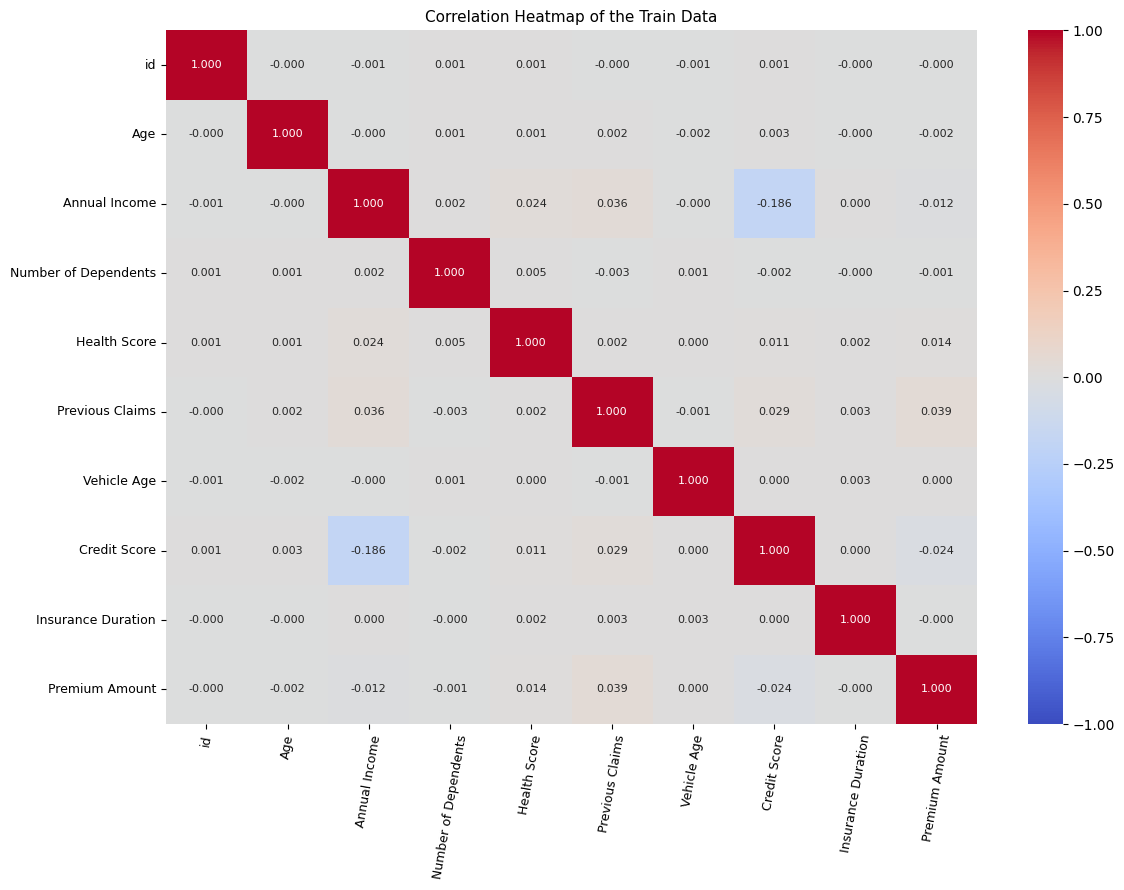

In [26]:
# after filling NAs lets check correlation again
# Select only numeric columns from the training data
numeric_data = train_df.select_dtypes(include=['number'])

# Create the heatmap
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmax=1, vmin=-1,
                      annot_kws={"size": 8}, fmt=".3f")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=80, fontsize=9)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=9)

plt.title("Correlation Heatmap of the Train Data", fontsize=11)
plt.tight_layout()
plt.show()